#### Feature selection for DeathFromDisease

In [19]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

In [20]:
#En son veriler
X_train=pd.read_csv("X_train.csv", index_col="ID")
X_test=pd.read_csv("X_test.csv", index_col="ID")
y_train=pd.read_csv("y_train.csv", index_col="ID")
y_test=pd.read_csv("y_test.csv", index_col="ID")

In [21]:
y_train["DeathFromDisease"].value_counts()

DeathFromDisease
0    220
1     78
Name: count, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
# #only get one target
y_death=y_train["DeathFromDisease"]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the class labels to numeric values
y_death_encode = label_encoder.fit_transform(y_death)

# Now, if you want to get the original labels from the encoded values:
original_labels = label_encoder.inverse_transform(y_death_encode)

In [23]:
X_train

,Gender_F,Gender_M,clinico.genetic.subgroup_MNA,clinico.genetic.subgroup_ST1,clinico.genetic.subgroup_ST4,clinico.genetic.subgroup_ST4S,MYCN.status_Amp,MYCN.status_NoAmp,Age,Unnamed: 14,...,Unnamed: 44712,Unnamed: 44713,PDE3B,Unnamed: 44715,LINC01588,Unnamed: 44717,Unnamed: 44718,Unnamed: 44719,Unnamed: 44720,Unnamed: 44721
ID,,,,,,,,,,,,,,,,,,,,,
ICGC_466,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.480811,-0.488997,...,-1.653599,-0.106549,0.851564,-1.848442,0.378614,-1.019042,0.089275,-0.019078,0.488320,0.427556
ICGC_292,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.677666,1.277924,...,-1.338185,0.067910,1.017450,-0.278487,-1.188787,-0.878331,0.330762,-0.378721,-0.571040,-0.804698
ICGC_032,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.404137,-0.162796,...,0.974848,0.067910,1.143839,0.615659,0.854896,0.983374,0.049027,0.900780,0.712416,0.174353
ICGC_408,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.026905,0.471483,...,-0.873826,-0.869807,-0.736202,-0.132929,-0.920337,-1.419525,0.089275,-2.349844,-1.915612,0.039312
ICGC_108,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.427002,-0.072185,...,0.002323,0.820265,-0.728302,0.012630,2.552192,0.777720,-0.796179,1.633899,-0.204338,0.663879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICGC_309,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.738639,0.081854,...,-0.023962,0.493154,-0.270141,0.054218,-0.643228,-0.715973,-0.916923,-1.167170,-0.530295,0.039312
ICGC_371,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.518919,1.142007,...,-0.716120,-0.259200,0.180121,0.345336,-0.400757,-0.531968,0.230142,-0.357972,-0.082105,0.393796
ICGC_107,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.379579,0.081854,...,2.043750,0.067910,0.630382,0.470100,0.664383,1.416328,1.095472,1.087518,0.916139,0.292515


#### Random Forest Feature selection

In [24]:
# # Import necessary libraries
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, SelectPercentile
# from sklearn.model_selection import KFold, StratifiedKFold, StratifiedGroupKFold
# from sklearn.metrics import accuracy_score, f1_score

# skf = StratifiedKFold(n_splits=5)

# rf = RandomForestClassifier()

# # Initialize lists to store accuracy and F1 scores for each fold
# accuracy_scores = []
# f1_scores = []

# ## Number of top features
# top_k = 300

# # Initialize list to hold common features from each fold
# common_features = []

# # Iterate over each split
# # Iterate over each split
# for train_index, test_index in skf.split(X, y):
#     X_train_temp, X_test_temp = X.iloc[train_index], X.iloc[test_index]  
#     y_train_temp, y_test_temp = y[train_index], y[test_index]

#     # Initialize feature selectors
#     selector_kbest = SelectKBest(score_func=f_classif, k=top_k)  # Adjust 'k' as per your requirements
#     selector_percentile = SelectPercentile(score_func=f_classif, percentile=1)
    
#     # Fit and transforX_train, y_trainm the data
#     X_new_kbest = selector_kbest.fit_transform(X_train_temp, y_train_temp)
#     X_new_percentile = selector_percentile.fit_transform(X_train_temp, y_train_temp)
    
#     # Get the selected features
#     selected_features_kbest = X_train_temp.columns[selector_kbest.get_support()]
#     selected_features_percentile = X_train_temp.columns[selector_percentile.get_support()]
    
#     # Get the common features and add to the list
#     common_features_fold = set(selected_features_kbest) & set(selected_features_percentile)
#     common_features.append(common_features_fold)
#     #print("Common Features in thi Fold : ", common_features_fold )

#     # Train the model on the selected features and compute the accuracy
#     X_train_selected = X_train_temp[list(common_features_fold)]
#     X_test_selected = X_test_temp[list(common_features_fold)]
#     rf.fit(X_train_selected, y_train_temp)
#     y_pred = rf.predict(X_test_selected)

#      # Calculate accuracy
#     accuracy = accuracy_score(y_test_temp, y_pred)
    
#     # Calculate F1 score
#     f1 = f1_score(y_test_temp, y_pred, average="weighted")

#     print(f'Accuracy for this fold: {accuracy}')
#     print(f'F1 score for this fold: {f1}')

#     # Append scores to the lists
#     accuracy_scores.append(accuracy)
#     f1_scores.append(f1)

# # Calculate the mean accuracy and F1 score
# mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
# mean_f1_score = sum(f1_scores) / len(f1_scores)

# print(f'Mean Accuracy: {mean_accuracy}')
# print(f'Mean F1 Score: {mean_f1_score}')


# # Get the intersection of common features from all folds
# final_common_features = set.intersection(*map(set, common_features))

# print(f"Final common features: {final_common_features}")



In [25]:
# # Convert the set to a DataFrame
# final_common_features_df = pd.DataFrame(final_common_features, columns=["FeatureName"])

# # Save it to a CSV file
# final_common_features_df.to_csv("final_common_features_for_DeathFromDisease.csv", index=False)

MYCN.status_NoAmp,MYCN.status_Amp, clinico.genetic.subgroup_ST1 and clinico.genetic.subgroup_MNA are also selected.

####  RANDOM FOREST FEATURE IMPORTANCE

In [26]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize a Random Forest Classifier
# rfc = RandomForestClassifier(random_state=42)

# # Initialize lists to store feature importances for each fold
# feature_importances = []

# # Initialize StratifiedKFold
# skf = StratifiedKFold(n_splits=5)

# # Iterate over each split
# for train_index, test_index in skf.split(X, y):
#     X_train_temp, X_test_temp = X.iloc[train_index], X.iloc[test_index]
#     y_train_temp, y_test_temp = y[train_index], y[test_index]

#     # Fit the Random Forest Classifier
#     rfc.fit(X_train_temp, y_train_temp)

#     # Get feature importances from the trained model
#     importances = rfc.feature_importances_
#     feature_importances.append(importances)

# # Calculate the mean feature importances across all folds
# mean_feature_importances = np.mean(feature_importances, axis=0)

# # Sort the common features by their corresponding importances in descending order
# sorted_common_features = [X.columns[feature] for feature in sorted(common_features, key=lambda x: mean_feature_importances[x], reverse=False)]

# # Select the top N common features (e.g., top 100 features)
# num_top_features = 100
# top_common_features = sorted_common_features[:num_top_features]

# # Plot the top common feature importances in a horizontal bar chart
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(top_common_features)), [mean_feature_importances[X.columns.get_loc(feature)] for feature in top_common_features], align="center", color="rosybrown")
# plt.yticks(range(len(top_common_features)), top_common_features)
# plt.xlabel("Mean Feature Importance")
# plt.ylabel("Feature")
# plt.title("Top Common Feature Importances for DeathFromDisease")
# plt.show()




### Hyperparameter tuning and Cross Validation

Stratified Cross-Validation on X_train for multiclass INSS.Stage clinical endpoint, after hyperparameter tuning (cv=3) because stage2 has only 3 samples

Conducting a 3-fold cross-validation on the training dataset after hyperparameter tuning is a prudent approach in machine learning. This practice allows to evaluate the model's generalization performance within the training dataset without risking data leakage from the reserved test data. In addition CV provides a valuable assessment of how well your model performs across different subsets of the training data and seeing the anomalies on the data which offering a reasonable estimate of its potential performance on unseen data. Moreover, comparing the cross-validation results to the initial single random split helps me estimate the consistency of your model's performance and builds confidence in the reliability of that single split. In otherwords, I have performed the train and test split from original data and I have one split for trainset only but in order to understand how this split reflects the overall dataset, this approach is very valuable.

##### Set the X and y

In [27]:
####X feature matrix
#### Import selected features for HighRisk
selected_features_death = pd.read_csv("final_common_features_for_DeathFromDisease.csv",index_col=False)
##
#### Put them in a list
selected_features = selected_features_death['FeatureName'].tolist()

# # Subset X_train to include only the selected features
X_sub_death = X_train[selected_features]
X_sub_death 

#X_sub_death # y_death

,Unnamed: 20232,Unnamed: 36423,Unnamed: 23282,DDOST,Unnamed: 30203,Unnamed: 289,Unnamed: 6889,Unnamed: 1019,Unnamed: 12693,Unnamed: 8169,...,Unnamed: 11059,TMEM246,CCDC125,Unnamed: 23425,MTMR9LP,Unnamed: 31810,Unnamed: 10181,OR8K3,Unnamed: 18517,SLC16A10
ID,,,,,,,,,,,,,,,,,,,,,
ICGC_466,-0.036532,-0.410118,0.000655,0.280497,-0.006859,-0.602588,0.364627,-0.223546,-0.235130,0.304195,...,-0.684636,0.002903,-0.861180,0.255405,0.493617,0.021961,0.071507,0.134758,0.355751,-0.063051
ICGC_292,-1.315718,-0.331300,-0.145688,-1.498809,0.445906,-0.787458,-0.126170,-1.447762,-0.289510,-1.086577,...,-0.752220,0.658351,-1.726937,-0.090328,0.187416,-0.874847,-0.974337,-1.167311,-0.133833,-0.316105
ICGC_032,-1.005288,-1.103718,-0.574959,0.772018,-1.045557,-0.587182,-0.318983,-0.490207,-0.697360,-0.961564,...,-0.904286,0.501043,0.158753,-0.205572,0.921143,-0.450681,-0.680193,-1.270445,-1.122417,0.000212
ICGC_408,0.942929,0.456880,0.283584,-1.567622,1.111738,0.152301,0.119229,1.824895,0.213506,1.101155,...,-0.279127,-0.189361,1.392160,0.370649,-0.580976,0.858173,1.084668,-0.277779,0.063884,0.949163
ICGC_108,-0.009771,-0.347064,-0.087151,1.410995,-0.546183,-0.695023,0.487327,-0.162941,-0.275915,-0.055218,...,0.177070,0.780701,0.004577,-0.666549,0.210525,-0.583990,-0.663852,0.560187,-0.020852,0.363977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICGC_309,0.022343,-0.646573,-0.282274,0.388631,-0.006859,-1.419100,-1.581032,-1.084134,-0.806120,-0.742791,...,-1.056352,0.291300,-0.967917,-1.209843,0.770931,-0.462800,-1.726037,-0.986826,-1.499020,-0.331920
ICGC_371,0.611090,1.560333,-0.145688,0.123210,1.657720,0.568260,0.312042,0.334018,1.015611,-0.031778,...,-0.160854,-1.613867,1.095668,1.193822,0.510949,0.118913,0.480040,0.495728,1.174863,1.123137
ICGC_107,-0.791198,-0.189428,-0.253006,1.253708,-1.438398,-0.094193,0.206871,0.370381,0.145530,-0.031778,...,0.599474,0.894312,-0.280056,-0.913501,1.417998,-0.171944,-0.222637,-0.587181,-0.642248,-1.138528


#X_sub_death # y_death

#### RANDOM FOREST HYPERPARAMETER TUNING FOR SELECTED FEATURES

In [47]:
#Import necessary libraries
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

##############FOR RANDOM FOREST-HYPER PARAMETER TUNING#########################

# Set the parameters for grid search (for Random Forest) #we can give choices inside in list as much as we want
param_dist = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]#choices 2,5 and 10
}

# Initialize a RandomForestClassifier (define the Random Forest classifier)
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV (define the grid search algorithm)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=5) #here in param_grid ,we provide the param_grid that we set above

# Fit GridSearchCV
random_search.fit(X_sub_death, y_death)
#during grid search for train set, every possible combinations of the parameter choices that we set above will be tested.
#And for ever single parameter combination, it will run cross_validation for 5 folds

#after that we obtain the best parameters from the grid search

# Get the best parameters (for the random forest)
best_params = grid_search.best_params_
print('Best parameters for RandomForestClassifier: ', best_params)

Best parameters for RandomForestClassifier:  {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}


#### RANDOM FOREST CROSS VALIDATION FOR SELECTED FEATURES

In [29]:
#X_sub_death # y_death

Confusion Matrix for Fold 0 with DeathFromDisease:
    0   1
0  69   5
1  14  12
Confusion Matrix for Fold 1 with DeathFromDisease:
    0   1
0  67   6
1  14  12
Confusion Matrix for Fold 2 with DeathFromDisease:
    0   1
0  58  15
1   7  19
Mean Accuracy: 0.7952525252525252
Mean Precision: 0.6437908496732027
Mean Recall: 0.5512820512820512
Mean F1-score: 0.5789758045571999
Mean ROC-AUC: 0.8756087488964202
Mean PR-AUC: 0.710486324007629


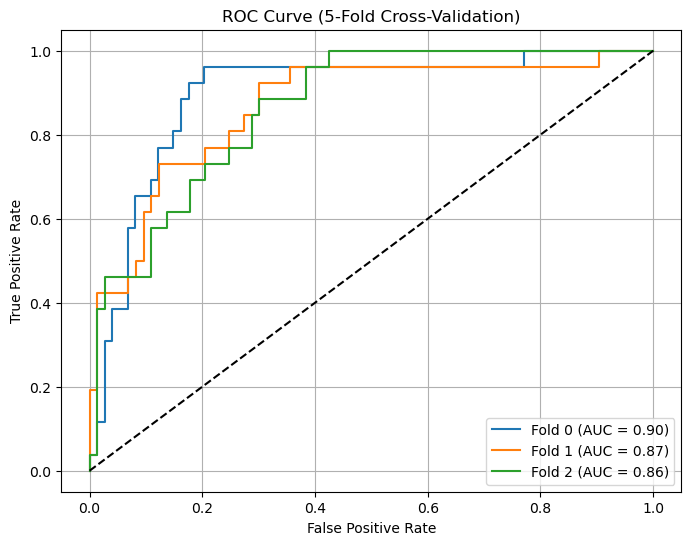

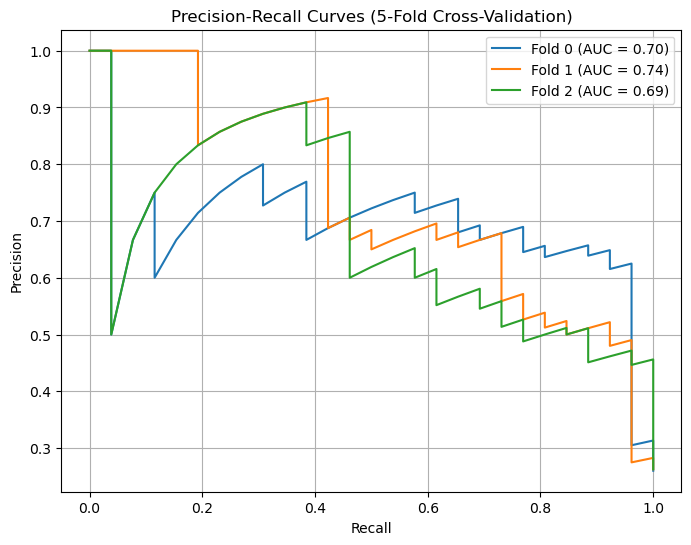

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(**best_params, random_state=42)

# Define the number of folds for cross-validation
n_splits = 3

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []
pr_aucs = []

# Initialize variables for mean ROC-AUC and PR-AUC
mean_roc_auc = 0
mean_pr_auc = 0

# Initialize lists to store ROC and PR curves for each fold
roc_curves = []

# Initialize lists to store recall and precision values for each fold
recall_values = []
precision_values = []

# Initialize the list to store confusion matrices for each fold
confusion_matrices = []

# Define your binary class labels
class_labels = y_death.unique()

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=n_splits)

for train_index, test_index in skf.split(X_sub_death.values, y_death):
    X_train, X_test = X_sub_death.iloc[train_index], X_sub_death.iloc[test_index]
    y_train, y_test = y_death[train_index], y_death[test_index]

    # Train the Random Forest classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_probs = clf.predict_proba(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Calculate ROC-AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])
    roc_aucs.append(roc_auc)
    roc_curves.append((fpr, tpr))

    # Calculate and append the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Calculate Precision-Recall values for this fold
    precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])
    recall_values.append(recall_fold)
    precision_values.append(precision_fold)

    # Calculate PR-AUC for this fold
    pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])
    pr_aucs.append(pr_auc)

    # Update mean ROC-AUC and PR-AUC
    mean_roc_auc += roc_auc
    mean_pr_auc += pr_auc

# Calculate mean ROC-AUC and PR-AUC across folds
mean_roc_auc /= n_splits
mean_pr_auc /= n_splits

# Print the confusion matrices for each fold
for i, conf_matrix in enumerate(confusion_matrices):
    confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print(f"Confusion Matrix for Fold {i} with DeathFromDisease:")
    print(confusion_matrix_df)

# Print the mean metrics across folds
print("Mean Accuracy:", np.mean(accuracies))
print("Mean Precision:", np.mean(precisions))
print("Mean Recall:", np.mean(recalls))
print("Mean F1-score:", np.mean(f1_scores))
print("Mean ROC-AUC:", mean_roc_auc)
print("Mean PR-AUC:", mean_pr_auc)

# Plot the ROC curve for each fold and the mean ROC-AUC
plt.figure(figsize=(8, 6))
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = roc_aucs[i]
    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curves for each fold
plt.figure(figsize=(8, 6))
for i, (recall, precision) in enumerate(zip(recall_values, precision_values)):
    pr_auc = pr_aucs[i]
    plt.plot(recall, precision, label=f'Fold {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

#### SVM (RADIAL) HYPERPARAMETER TUNING FOR SELECTED FEATURES

In [31]:
#Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
import optuna #hyperparameter optimizer
import matplotlib.pyplot as plt

In [32]:
#import the train-test split library
from sklearn.model_selection import train_test_split
#X_sub_death   y_death


#Split the data (20% for test, because we have small dataset)
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(X_sub_death, y_death, test_size=0.2, random_state=1)

#Check the dimensions of the data

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Set the parameters for grid search (for Random Forest) #we can give choices inside in list as much as we want
param_dist = {
    'C': loguniform(1e-4, 1e4),
    'gamma': loguniform(1e-4, 1e4)
}

# Create an SVC model
svm = SVC(random_state=42, probability=True)

# Initialize GridSearchCV (define the grid search algorithm)
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, cv=5) #here in param_grid ,we provide the param_grid that we set above

# Fit GridSearchCV
random_search.fit(X_sub_death, y_death)
#during grid search for train set, every possible combinations of the parameter choices that we set above will be tested.
#And for ever single parameter combination, it will run cross_validation for 5 folds

#after that we obtain the best parameters from the grid search

# Get the best parameters (for the random forest)
best_params = random_search.best_params_
print('Best parameters for RandomForestClassifier: ', best_params)

Best parameters for RandomForestClassifier:  {'C': 89.69942588055982, 'gamma': 0.005092250297785811}


#### SVM (RADIAL) CROSS VALIDATION FOR SELECTED FEATURES

Confusion Matrix for Fold 0 with DeathFromDisease:
    0   1
0  69   5
1  14  12
Confusion Matrix for Fold 1 with DeathFromDisease:
    0   1
0  65   8
1  16  10
Confusion Matrix for Fold 2 with DeathFromDisease:
    0   1
0  62  11
1  10  16
Mean Accuracy: 0.7851515151515152
Mean Precision: 0.6180101670297748
Mean Recall: 0.4871794871794872
Mean F1-score: 0.5388195247782787
Mean ROC-AUC: 0.8455201777119585
Mean PR-AUC: 0.5747367968781535


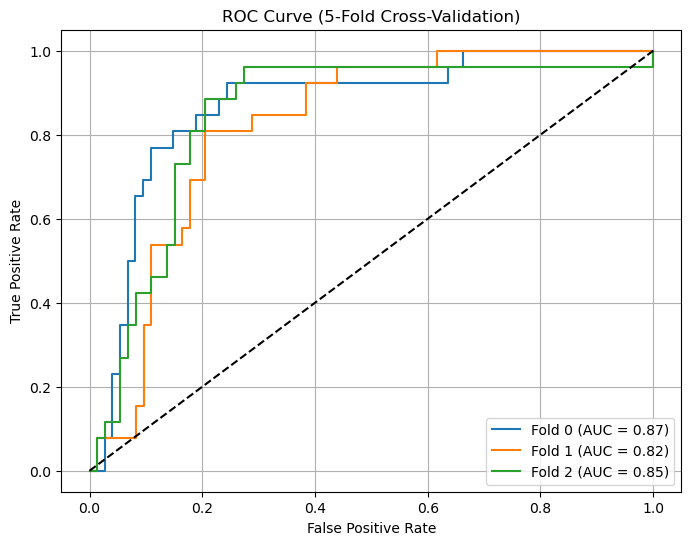

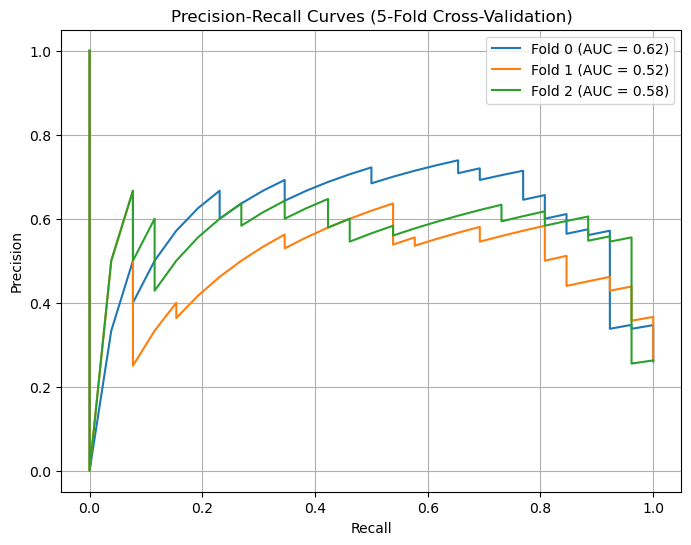

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a SVM classifier
# Specify hyperparameters
# C_value = 189.02181143134422
# gamma_value = 0.013336031674559727

# Create a SVM classifier
clf = SVC(**best_params, random_state=42, probability=True)

# Define the number of folds for cross-validation
n_splits = 3

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []
pr_aucs = []

# Initialize variables for mean ROC-AUC and PR-AUC
mean_roc_auc = 0
mean_pr_auc = 0

# Initialize lists to store ROC and PR curves for each fold
roc_curves = []

# Initialize lists to store recall and precision values for each fold
recall_values = []
precision_values = []

# Initialize the list to store confusion matrices for each fold
confusion_matrices = []

# Define your binary class labels
class_labels = y_death.unique()

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=n_splits)

for train_index, test_index in skf.split(X_sub_death.values, y_death):
    X_train, X_test = X_sub_death.iloc[train_index], X_sub_death.iloc[test_index]
    y_train, y_test = y_death[train_index], y_death[test_index]

    # Train the Random Forest classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_probs = clf.predict_proba(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Calculate ROC-AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])
    roc_aucs.append(roc_auc)
    roc_curves.append((fpr, tpr))

    # Calculate and append the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Calculate Precision-Recall values for this fold
    precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])
    recall_values.append(recall_fold)
    precision_values.append(precision_fold)

    # Calculate PR-AUC for this fold
    pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])
    pr_aucs.append(pr_auc)

    # Update mean ROC-AUC and PR-AUC
    mean_roc_auc += roc_auc
    mean_pr_auc += pr_auc

# Calculate mean ROC-AUC and PR-AUC across folds
mean_roc_auc /= n_splits
mean_pr_auc /= n_splits

# Print the confusion matrices for each fold
for i, conf_matrix in enumerate(confusion_matrices):
    confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print(f"Confusion Matrix for Fold {i} with DeathFromDisease:")
    print(confusion_matrix_df)

# Print the mean metrics across folds
print("Mean Accuracy:", np.mean(accuracies))
print("Mean Precision:", np.mean(precisions))
print("Mean Recall:", np.mean(recalls))
print("Mean F1-score:", np.mean(f1_scores))
print("Mean ROC-AUC:", mean_roc_auc)
print("Mean PR-AUC:", mean_pr_auc)

# Plot the ROC curve for each fold and the mean ROC-AUC
plt.figure(figsize=(8, 6))
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = roc_aucs[i]
    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curves for each fold
plt.figure(figsize=(8, 6))
for i, (recall, precision) in enumerate(zip(recall_values, precision_values)):
    pr_auc = pr_aucs[i]
    plt.plot(recall, precision, label=f'Fold {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

#### LOGISTIC REGRESSION HYPERPARAMETER TUNING FOR SELECTED FEATURES

In [35]:
##############FOR LOGISTIC REGRESSION-HYPER PARAMETER TUNING #########################
from sklearn.linear_model import LogisticRegression
# Set the parameters for random search (for logistic regression)
param_grid = {
    'C': np.logspace(-4, 4, 20),#this search is really large space
    'penalty': ['l1'], #l1 loss
    'solver': ['liblinear']
}

# Initialize a LogisticRegression (define the Logistic regression classifier)
lr = LogisticRegression(random_state=42)

# Initialize Grid_SearchCV (define the random search algorithm#this time we want to use Random serach because we dont want to search the all the combinations)
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)

# Fit Grid_SearchCV
grid_search.fit(X_sub_death, y_death)

#after that we  obtain the best parameters from the random search

# Get the best parameters
best_params = grid_search.best_params_
print('Best parameters for LogisticRegression: ', best_params)

Best parameters for LogisticRegression:  {'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}


#### LOGISTIC REGRESSION CROSS VALIDATION FOR SELECTED FEATURES

#X_sub_death  y_death

Confusion Matrix for Fold 0 with DeathFromDisease:
    0   1
0  68   6
1  14  12
Confusion Matrix for Fold 1 with DeathFromDisease:
    0   1
0  65   8
1  14  12
Confusion Matrix for Fold 2 with DeathFromDisease:
    0   1
0  59  14
1  10  16
Mean Accuracy: 0.7784511784511784
Mean Precision: 0.6
Mean Recall: 0.5128205128205129
Mean F1-score: 0.5462074157726332
Mean ROC-AUC: 0.8339788682254436
Mean PR-AUC: 0.599001100888945


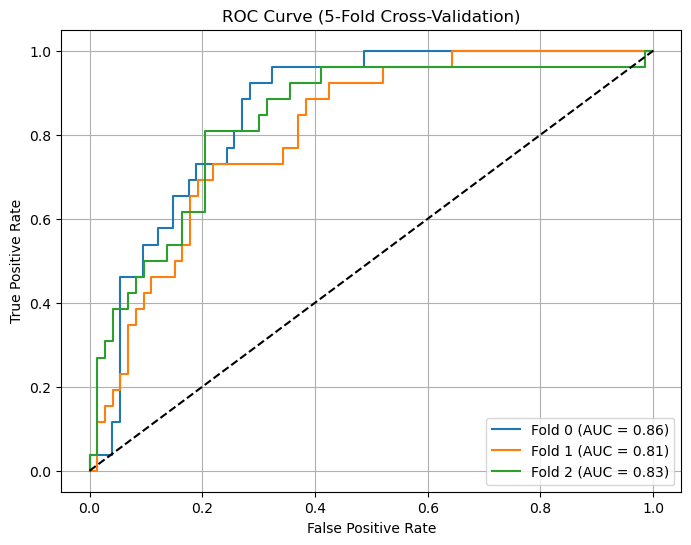

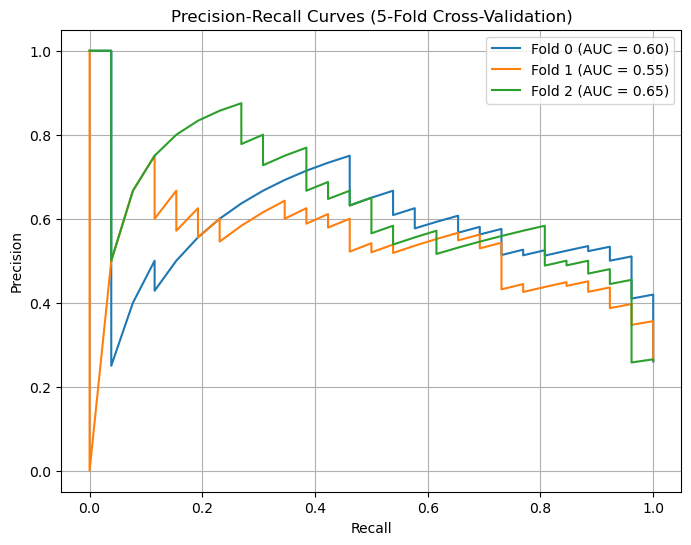

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = LogisticRegression(**best_params, random_state=42)

# Define the number of folds for cross-validation
n_splits = 3

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []
pr_aucs = []

# Initialize variables for mean ROC-AUC and PR-AUC
mean_roc_auc = 0
mean_pr_auc = 0

# Initialize lists to store ROC and PR curves for each fold
roc_curves = []

# Initialize lists to store recall and precision values for each fold
recall_values = []
precision_values = []

# Initialize the list to store confusion matrices for each fold
confusion_matrices = []

# Define your binary class labels
class_labels = y_death.unique()

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=n_splits)

for train_index, test_index in skf.split(X_sub_death.values, y_death):
    X_train, X_test = X_sub_death.iloc[train_index], X_sub_death.iloc[test_index]
    y_train, y_test = y_death[train_index], y_death[test_index]

    # Train the Random Forest classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_probs = clf.predict_proba(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Calculate ROC-AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])
    roc_aucs.append(roc_auc)
    roc_curves.append((fpr, tpr))

    # Calculate and append the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Calculate Precision-Recall values for this fold
    precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])
    recall_values.append(recall_fold)
    precision_values.append(precision_fold)

    # Calculate PR-AUC for this fold
    pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])
    pr_aucs.append(pr_auc)

    # Update mean ROC-AUC and PR-AUC
    mean_roc_auc += roc_auc
    mean_pr_auc += pr_auc

# Calculate mean ROC-AUC and PR-AUC across folds
mean_roc_auc /= n_splits
mean_pr_auc /= n_splits

# Print the confusion matrices for each fold
for i, conf_matrix in enumerate(confusion_matrices):
    confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print(f"Confusion Matrix for Fold {i} with DeathFromDisease:")
    print(confusion_matrix_df)

# Print the mean metrics across folds
print("Mean Accuracy:", np.mean(accuracies))
print("Mean Precision:", np.mean(precisions))
print("Mean Recall:", np.mean(recalls))
print("Mean F1-score:", np.mean(f1_scores))
print("Mean ROC-AUC:", mean_roc_auc)
print("Mean PR-AUC:", mean_pr_auc)

# Plot the ROC curve for each fold and the mean ROC-AUC
plt.figure(figsize=(8, 6))
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = roc_aucs[i]
    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curves for each fold
plt.figure(figsize=(8, 6))
for i, (recall, precision) in enumerate(zip(recall_values, precision_values)):
    pr_auc = pr_aucs[i]
    plt.plot(recall, precision, label=f'Fold {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()


### HYPER PARAMETER TUNING AND CROSS VALIDATION FOR ALL FEATURES

#### For all Features (no selection) for DeathFromDisease

In [37]:
X_train=pd.read_csv("X_train.csv", index_col="ID")
y_train=pd.read_csv("y_train.csv", index_col="ID")

X_all_death=X_train.copy()

from sklearn.preprocessing import LabelEncoder
# #only get one target
y_death=y_train["DeathFromDisease"]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the class labels to numeric values
y_death_encode = label_encoder.fit_transform(y_death)

# Now, if you want to get the original labels from the encoded values:
original_labels = label_encoder.inverse_transform(y_death_encode)

X_all_death y_death

#### RANDOM FOREST HYPER PARAMETER TUNING FOR ALL FEATURES

In [38]:
#Import necessary libraries
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

##############FOR RANDOM FOREST-HYPER PARAMETER TUNING#########################

# Set the parameters for grid search (for Random Forest) #we can give choices inside in list as much as we want
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]#choices 2,5 and 10
}

# Initialize a RandomForestClassifier (define the Random Forest classifier)
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV (define the grid search algorithm)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5) #here in param_grid ,we provide the param_grid that we set above

# Fit GridSearchCV
grid_search.fit(X_all_death, y_death)
#during grid search for train set, every possible combinations of the parameter choices that we set above will be tested.
#And for ever single parameter combination, it will run cross_validation for 5 folds

#after that we obtain the best parameters from the grid search

# Get the best parameters (for the random forest)
best_params = grid_search.best_params_
print('Best parameters for RandomForestClassifier: ', best_params)

Best parameters for RandomForestClassifier:  {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}


#### RANDOM FOREST CROSS VALIDATION FOR All FEATURES

Confusion Matrix for Fold 0 with DeathFromDisease:
    0  1
0  70  4
1  18  8
Confusion Matrix for Fold 1 with DeathFromDisease:
    0  1
0  71  2
1  20  6
Confusion Matrix for Fold 2 with DeathFromDisease:
    0   1
0  66   7
1  11  15
Mean Accuracy: 0.7919865319865321
Mean Precision: 0.6994949494949494
Mean Recall: 0.3717948717948718
Mean F1-score: 0.46633126934984515
Mean ROC-AUC: 0.8637138191932712
Mean PR-AUC: 0.6853038866215847


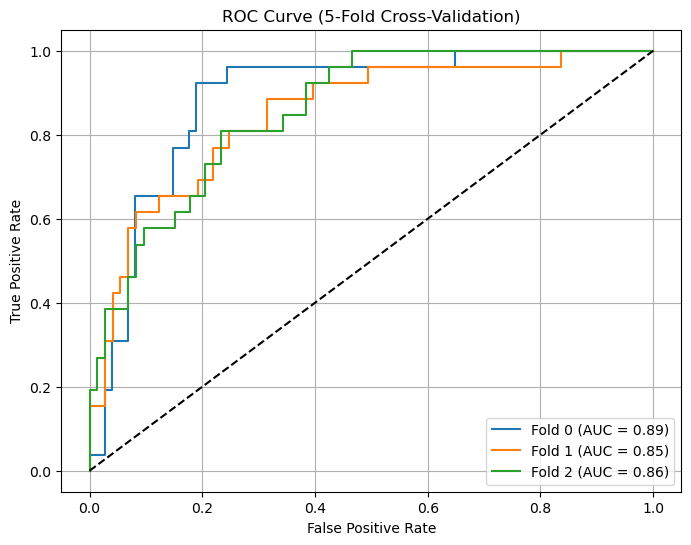

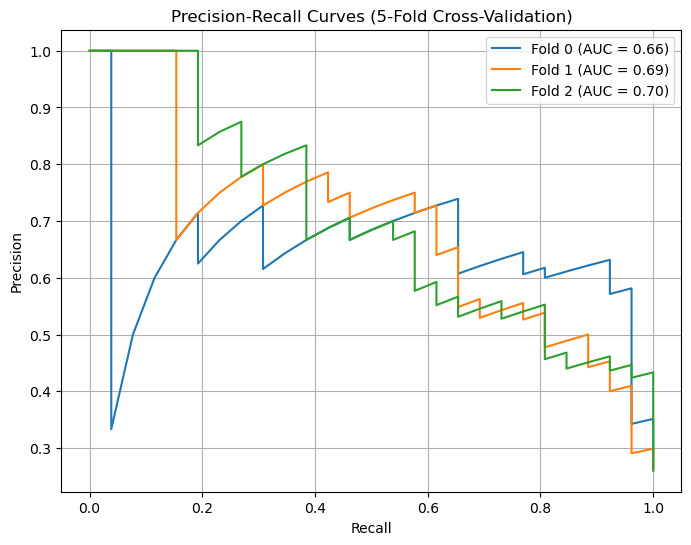

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(**best_params, random_state=42)

# Define the number of folds for cross-validation
n_splits = 3

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []
pr_aucs = []

# Initialize variables for mean ROC-AUC and PR-AUC
mean_roc_auc = 0
mean_pr_auc = 0

# Initialize lists to store ROC and PR curves for each fold
roc_curves = []

# Initialize lists to store recall and precision values for each fold
recall_values = []
precision_values = []

# Initialize the list to store confusion matrices for each fold
confusion_matrices = []

# Define your binary class labels
class_labels = y_death.unique()

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=n_splits)

for train_index, test_index in skf.split(X_all_death.values, y_death):
    X_train, X_test = X_all_death.iloc[train_index], X_all_death.iloc[test_index]
    y_train, y_test = y_death[train_index], y_death[test_index]

    # Train the Random Forest classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_probs = clf.predict_proba(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Calculate ROC-AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])
    roc_aucs.append(roc_auc)
    roc_curves.append((fpr, tpr))

    # Calculate and append the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Calculate Precision-Recall values for this fold
    precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])
    recall_values.append(recall_fold)
    precision_values.append(precision_fold)

    # Calculate PR-AUC for this fold
    pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])
    pr_aucs.append(pr_auc)

    # Update mean ROC-AUC and PR-AUC
    mean_roc_auc += roc_auc
    mean_pr_auc += pr_auc

# Calculate mean ROC-AUC and PR-AUC across folds
mean_roc_auc /= n_splits
mean_pr_auc /= n_splits

# Print the confusion matrices for each fold
for i, conf_matrix in enumerate(confusion_matrices):
    confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print(f"Confusion Matrix for Fold {i} with DeathFromDisease:")
    print(confusion_matrix_df)

# Print the mean metrics across folds
print("Mean Accuracy:", np.mean(accuracies))
print("Mean Precision:", np.mean(precisions))
print("Mean Recall:", np.mean(recalls))
print("Mean F1-score:", np.mean(f1_scores))
print("Mean ROC-AUC:", mean_roc_auc)
print("Mean PR-AUC:", mean_pr_auc)

# Plot the ROC curve for each fold and the mean ROC-AUC
plt.figure(figsize=(8, 6))
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = roc_aucs[i]
    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curves for each fold
plt.figure(figsize=(8, 6))
for i, (recall, precision) in enumerate(zip(recall_values, precision_values)):
    pr_auc = pr_aucs[i]
    plt.plot(recall, precision, label=f'Fold {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

#### SVM (RADIAL) HYPERPARAMETER TUNING FOR All FEATURES

In [40]:
#Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
import optuna #hyperparameter optimizer
import matplotlib.pyplot as plt

In [41]:
#import the train-test split library
from sklearn.model_selection import train_test_split
#X_all_death y_death


#Split the data (20% for test, because we have small dataset)
X_train_all_death, X_test_all_death, y_train_death, y_test_death = train_test_split(X_all_death, y_death, test_size=0.2, random_state=1)

#Check the dimensions of the data

In [42]:
########FOR SUPPORT VECTOR MACHINE-HYPER PARAMETER TUNING (we use optuna) ########################
import optuna

# Define the objective function for optuna
def objective(trial):
    
    C = trial.suggest_loguniform('C', 1e-4, 1e4) # C value hyperparameter and we are searching a parameter from 1e-4 to 1e4 
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e4) #kernel hyperparameter
    
    svm = SVC(C=C, gamma=gamma, random_state=42, probability=True)
    svm.fit(X_train_all_death, y_train_death)
    predictions = svm.predict(X_test_all_death)
    
    return accuracy_score(y_test_death, predictions)

# Run optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

#We then get the best parameters

# Get the best parameters
best_params = study.best_params
print('Best parameters for SVC: ', best_params)

[I 2023-10-21 10:44:28,300] A new study created in memory with name: no-name-92f87d05-74ef-406d-a7f4-b579efaf8e5a
C:\Users\isile\AppData\Local\Temp\ipykernel_34600\1528006429.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4) # C value hyperparameter and we are searching a parameter from 1e-4 to 1e4
C:\Users\isile\AppData\Local\Temp\ipykernel_34600\1528006429.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-4, 1e4) #kernel hyperparameter
[I 2023-10-21 10:44:30,651] Trial 0 finished with value: 0.7666666666666667 and parameters: {'C': 0.00011682878017541502, 'gamma': 2.228493858

Best parameters for SVC:  {'C': 0.00011682878017541502, 'gamma': 2.228493858586445}


#### SVM (RADIAL) CROSS VALIDATION FOR All FEATURES

C:\Users\isile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\isile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix for Fold 0 with DeathFromDisease:
    0  1
0  74  0
1  26  0
Confusion Matrix for Fold 1 with DeathFromDisease:
    0  1
0  73  0
1  26  0
Confusion Matrix for Fold 2 with DeathFromDisease:
    0  1
0  73  0
1  26  0
Mean Accuracy: 0.7382491582491583
Mean Precision: 0.0
Mean Recall: 0.0
Mean F1-score: 0.0
Mean ROC-AUC: 0.5
Mean PR-AUC: 0.2617508417508418


C:\Users\isile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


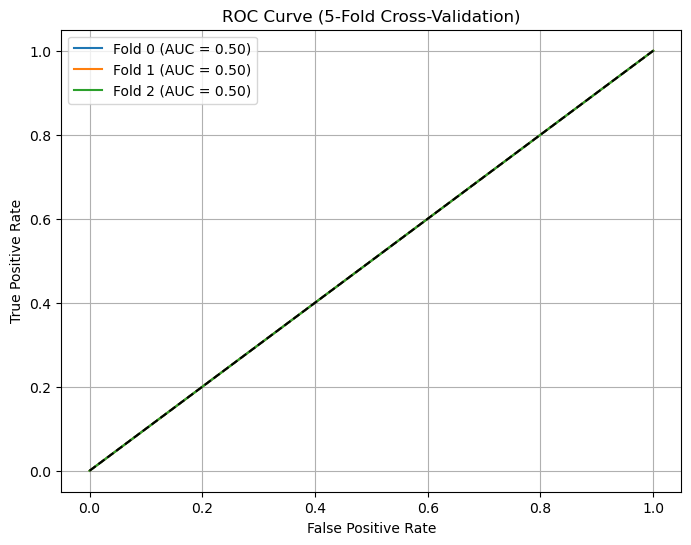

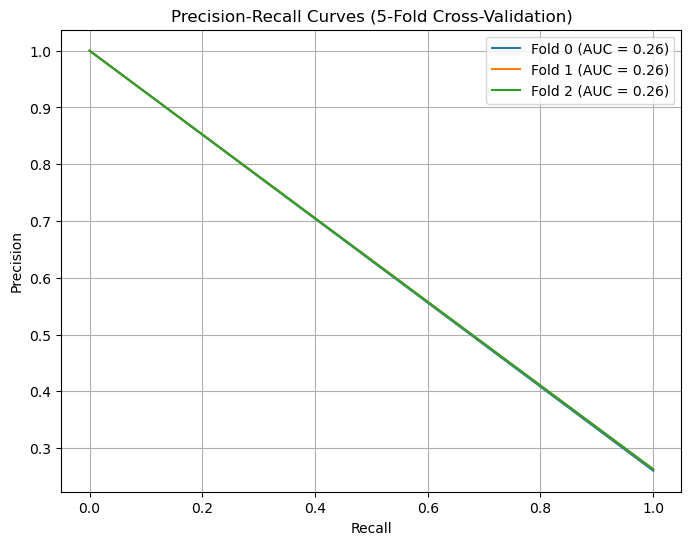

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a SVM classifier
# Specify hyperparameters
# C_value = 166.68236778150623
# gamma_value = 0.0007178741659546704

# Create a SVM classifier
clf = SVC(**best_params, random_state=42, probability=True)

# Define the number of folds for cross-validation
n_splits = 3

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []
pr_aucs = []

# Initialize variables for mean ROC-AUC and PR-AUC
mean_roc_auc = 0
mean_pr_auc = 0

# Initialize lists to store ROC and PR curves for each fold
roc_curves = []

# Initialize lists to store recall and precision values for each fold
recall_values = []
precision_values = []

# Initialize the list to store confusion matrices for each fold
confusion_matrices = []

# Define your binary class labels
class_labels = y_death.unique()

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=n_splits)

for train_index, test_index in skf.split(X_all_death.values, y_death):
    X_train, X_test = X_all_death.iloc[train_index], X_all_death.iloc[test_index]
    y_train, y_test = y_death[train_index], y_death[test_index]

    # Train the Random Forest classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_probs = clf.predict_proba(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Calculate ROC-AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])
    roc_aucs.append(roc_auc)
    roc_curves.append((fpr, tpr))

    # Calculate and append the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Calculate Precision-Recall values for this fold
    precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])
    recall_values.append(recall_fold)
    precision_values.append(precision_fold)

    # Calculate PR-AUC for this fold
    pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])
    pr_aucs.append(pr_auc)

    # Update mean ROC-AUC and PR-AUC
    mean_roc_auc += roc_auc
    mean_pr_auc += pr_auc

# Calculate mean ROC-AUC and PR-AUC across folds
mean_roc_auc /= n_splits
mean_pr_auc /= n_splits

# Print the confusion matrices for each fold
for i, conf_matrix in enumerate(confusion_matrices):
    confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print(f"Confusion Matrix for Fold {i} with DeathFromDisease:")
    print(confusion_matrix_df)

# Print the mean metrics across folds
print("Mean Accuracy:", np.mean(accuracies))
print("Mean Precision:", np.mean(precisions))
print("Mean Recall:", np.mean(recalls))
print("Mean F1-score:", np.mean(f1_scores))
print("Mean ROC-AUC:", mean_roc_auc)
print("Mean PR-AUC:", mean_pr_auc)

# Plot the ROC curve for each fold and the mean ROC-AUC
plt.figure(figsize=(8, 6))
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = roc_aucs[i]
    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curves for each fold
plt.figure(figsize=(8, 6))
for i, (recall, precision) in enumerate(zip(recall_values, precision_values)):
    pr_auc = pr_aucs[i]
    plt.plot(recall, precision, label=f'Fold {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

#### LOGISTIC REGRESSION HYPERPARAMETER TUNING FOR ALL FEATURES

In [ ]:
##############FOR LOGISTIC REGRESSION-HYPER PARAMETER TUNING #########################
from sklearn.linear_model import LogisticRegression
# Set the parameters for random search (for logistic regression)
param_grid = {
    'C': np.logspace(-4, 4, 20),#this search is really large space
    'penalty': ['l1'], #l1 loss
    'solver': ['liblinear']
}

# Initialize a LogisticRegression (define the Logistic regression classifier)
lr = LogisticRegression(random_state=42)

# Initialize Grid_SearchCV (define the random search algorithm#this time we want to use Random serach because we dont want to search the all the combinations)
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)

# Fit Grid_SearchCV
grid_search.fit(X_all_death, y_death)

#after that we  obtain the best parameters from the random search

# Get the best parameters
best_params = grid_search.best_params_
print('Best parameters for LogisticRegression: ', best_params)

#### LOGISTIC REGRESSION CROSS VALIDATION FOR ALL FEATURES

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = LogisticRegression(**best_params, random_state=42)

# Define the number of folds for cross-validation
n_splits = 3

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []
pr_aucs = []

# Initialize variables for mean ROC-AUC and PR-AUC
mean_roc_auc = 0
mean_pr_auc = 0

# Initialize lists to store ROC and PR curves for each fold
roc_curves = []

# Initialize lists to store recall and precision values for each fold
recall_values = []
precision_values = []

# Initialize the list to store confusion matrices for each fold
confusion_matrices = []

# Define your binary class labels
class_labels = y_death.unique()

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=n_splits)

for train_index, test_index in skf.split(X_all_death.values, y_death):
    X_train, X_test = X_all_death.iloc[train_index], X_all_death.iloc[test_index]
    y_train, y_test = y_death[train_index], y_death[test_index]

    # Train the Random Forest classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_probs = clf.predict_proba(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Calculate ROC-AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])
    roc_aucs.append(roc_auc)
    roc_curves.append((fpr, tpr))

    # Calculate and append the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Calculate Precision-Recall values for this fold
    precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])
    recall_values.append(recall_fold)
    precision_values.append(precision_fold)

    # Calculate PR-AUC for this fold
    pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])
    pr_aucs.append(pr_auc)

    # Update mean ROC-AUC and PR-AUC
    mean_roc_auc += roc_auc
    mean_pr_auc += pr_auc

# Calculate mean ROC-AUC and PR-AUC across folds
mean_roc_auc /= n_splits
mean_pr_auc /= n_splits

# Print the confusion matrices for each fold
for i, conf_matrix in enumerate(confusion_matrices):
    confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print(f"Confusion Matrix for Fold {i} with HighRisk:")
    print(confusion_matrix_df)

# Print the mean metrics across folds
print("Mean Accuracy:", np.mean(accuracies))
print("Mean Precision:", np.mean(precisions))
print("Mean Recall:", np.mean(recalls))
print("Mean F1-score:", np.mean(f1_scores))
print("Mean ROC-AUC:", mean_roc_auc)
print("Mean PR-AUC:", mean_pr_auc)

# Plot the ROC curve for each fold and the mean ROC-AUC
plt.figure(figsize=(8, 6))
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = roc_aucs[i]
    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curves for each fold
plt.figure(figsize=(8, 6))
for i, (recall, precision) in enumerate(zip(recall_values, precision_values)):
    pr_auc = pr_aucs[i]
    plt.plot(recall, precision, label=f'Fold {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()
